<a href="https://colab.research.google.com/github/SuryanshNaugraiya/Bitcoin_Prediction_System/blob/master/DL_Models_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving bitcoin_usd.csv to bitcoin_usd.csv
User uploaded file "bitcoin_usd.csv" with length 101440 bytes


In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('bitcoin_usd.csv')

In [224]:
df

,_id,time,high,low,open,close
0,5f5c943ba9115d187c3c8ad4,1470268800,584.89,559.50,566.44,576.22
1,5f5c943ba9115d187c3c8ad5,1470355200,579.97,565.81,576.22,574.66
2,5f5c943ba9115d187c3c8ad6,1470441600,596.68,565.33,574.66,586.45
3,5f5c943ba9115d187c3c8ad7,1470528000,596.01,580.87,586.45,590.85
4,5f5c943ba9115d187c3c8ad8,1470614400,594.24,585.41,590.85,589.24
...,...,...,...,...,...,...
1496,5f5c943ba9115d187c3c90ac,1599523200,10443.72,9855.68,10379.08,10128.54
1497,5f5c943ba9115d187c3c90ad,1599609600,10349.09,9989.63,10128.54,10228.85
1498,5f5c943ba9115d187c3c90ae,1599696000,10493.32,10221.37,10228.85,10345.68
1499,5f5c943ba9115d187c3c90af,1599782400,10412.60,10215.49,10345.68,10398.50


In [225]:
df=df.drop(labels=['_id','time'],axis=1)

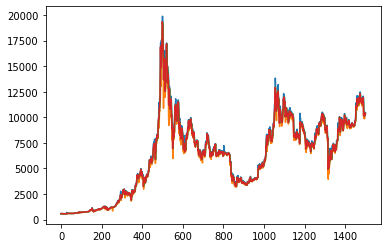

In [226]:
plt.plot(df)
plt.show()

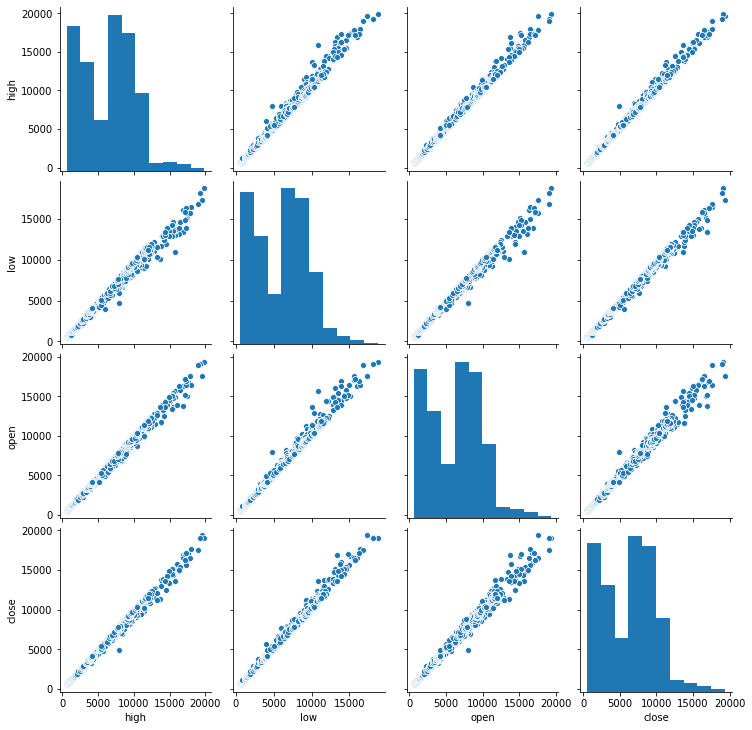

In [227]:
import seaborn as sns
sns.pairplot(df)

In [228]:
df.corr()

,high,low,open,close
high,1.000000,0.995285,0.997839,0.998047
low,0.995285,1.000000,0.996269,0.997598
open,0.997839,0.996269,1.000000,0.995761
close,0.998047,0.997598,0.995761,1.000000


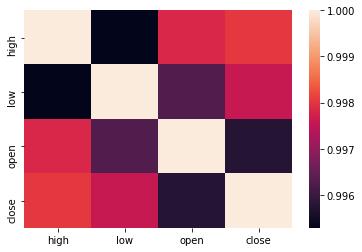

In [230]:
sns.heatmap(df.corr())

In [ ]:
y = df['high']

In [ ]:
y = np.array(y)

In [ ]:
y

array([  584.89,   579.97,   596.68, ..., 10493.32, 10412.6 , 10412.41])

In [ ]:
df=df.drop(labels=['high'],axis=1)

In [ ]:
df

,low,open,close
0,559.50,566.44,576.22
1,565.81,576.22,574.66
2,565.33,574.66,586.45
3,580.87,586.45,590.85
4,585.41,590.85,589.24
...,...,...,...
1496,9855.68,10379.08,10128.54
1497,9989.63,10128.54,10228.85
1498,10221.37,10228.85,10345.68
1499,10215.49,10345.68,10398.50


In [ ]:
X = np.array(df)

In [ ]:
X

array([[  559.5 ,   566.44,   576.22],
       [  565.81,   576.22,   574.66],
       [  565.33,   574.66,   586.45],
       ...,
       [10221.37, 10228.85, 10345.68],
       [10215.49, 10345.68, 10398.5 ],
       [10323.17, 10398.5 , 10349.8 ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X1=scaler.fit_transform(X.reshape(-1,3))

In [ ]:
X1

array([[1.20934738e-05, 0.00000000e+00, 4.93648601e-04],
       [3.58956289e-04, 5.20762336e-04, 4.10575050e-04],
       [3.32570528e-04, 4.37695951e-04, 1.03841939e-03],
       ...,
       [5.31128327e-01, 5.14500941e-01, 5.20739632e-01],
       [5.30805101e-01, 5.20721868e-01, 5.23552417e-01],
       [5.36724307e-01, 5.23534411e-01, 5.20959031e-01]])

In [ ]:
X1.shape

(1501, 3)

In [ ]:
n_features = 1
X1 = X1.reshape((X1.shape[0], X1.shape[1], n_features))

In [ ]:
X1.shape

(1501, 3, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y1=scaler.fit_transform(y.reshape(-1,1))

In [ ]:
y1

array([[5.14105511e-04],
       [2.59125762e-04],
       [1.12512406e-03],
       ...,
       [5.14019999e-01],
       [5.09836673e-01],
       [5.09826826e-01]])

In [ ]:
y1.shape

(1501, 1)

In [ ]:
# Importing the library
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1200, 3, 1)
(1200, 1)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(301, 3, 1)
(301, 1)


(None, None)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,GRU

# **GRU**

In [ ]:
# define model1 GRU
model1 = Sequential()
model1.add(GRU(100, activation='linear', return_sequences=True, input_shape=(3, 1)))
model1.add(GRU(50, activation='linear'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
# fit model
model1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0120
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 2.9274e-04
Epoch 3/100
38/38 [==============================] - 0s 6ms/step - loss: 1.4019e-04
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 1.2887e-04
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 1.2693e-04
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 1.3080e-04
Epoch 7/100
38/38 [==============================] - 0s 7ms/step - loss: 1.3599e-04
Epoch 8/100
38/38 [==============================] - 0s 6ms/step - loss: 1.2874e-04
Epoch 9/100
38/38 [==============================] - 0s 6ms/step - loss: 1.3047e-04
Epoch 10/100
38/38 [==============================] - 0s 6ms/step - loss: 1.5300e-04
Epoch 11/100
38/38 [==============================] - 0s 6ms/step - loss: 1.3563e-04
Epoch 12/100
38/38 [==============================] - 0s 6ms/step - loss: 1.30

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model1.predict(X_train)
test_predict=model1.predict(X_test)

In [ ]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_predict)


5.59721272155328e-05

In [ ]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test,test_predict)
mse1

5.374530229997672e-05

In [ ]:
### Calculate r2 performance metrics
import math
from sklearn.metrics import r2_score
r1 = r2_score(y_test,test_predict)
r1

0.9986993775205164

# **LSTM**

In [ ]:
# define model2 LSTM
model2 = Sequential()
model2.add(LSTM(100, activation='linear', return_sequences=True, input_shape=(3, 1)))
model2.add(LSTM(50, activation='linear'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# fit model
model2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0332
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 3.3275e-04
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 2.6074e-04
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 2.1121e-04
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 1.9269e-04
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 1.7857e-04
Epoch 8/100
38/38 [==============================] - 0s 6ms/step - loss: 1.9571e-04
Epoch 9/100
38/38 [==============================] - 0s 5ms/step - loss: 1.7918e-04
Epoch 10/100
38/38 [==============================] - 0s 5ms/step - loss: 1.7524e-04
Epoch 11/100
38/38 [==============================] - 0s 5ms/step - loss: 1.6308e-04
Epoch 12/100
38/38 [==============================] - 0s 5ms/step - loss: 1.6853e-

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model2.predict(X_train)
test_predict=model2.predict(X_test)

In [ ]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_predict)

0.00011654126826497658

In [ ]:
### Calculate MSE performance metrics
import math
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test,test_predict)
mse2

0.00015636029149544112

In [ ]:
### Calculate r2 performance metrics
import math
from sklearn.metrics import r2_score
r2 = r2_score(y_test,test_predict)
r2

0.9962161211991607

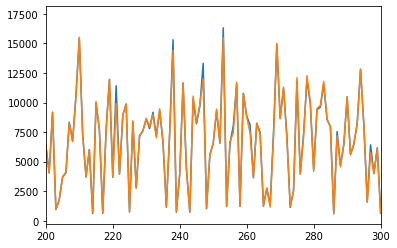

In [215]:
# plot 
plt.plot(scaler.inverse_transform(y_test))
plt.plot(scaler.inverse_transform(test_predict))
plt.xlim(200,300)
plt.show()

In [ ]:
df_model=pd.DataFrame({'Model_Applied':['GRU','LSTM'],'MSE':[mse1,mse2],'R2':[r1,r2]})
df_model

,Model_Applied,MSE,R2
0,GRU,0.000054,0.998699
1,LSTM,0.000156,0.996216
